# DAT341 Assignment 2
## Group 12：Guangyu Ma,Weiyou Wang,Yanping Tang

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

# Task1: Working with a dataset with categorical features
## Step 1.Reading the data

In [ ]:
#Reading datas
train_df = pd.read_csv('adult_train.csv')
test_df = pd.read_csv('adult_test.csv')

#Splite X,Y
X_train = train_df.drop(columns=['target'])
Y_train = train_df['target']

X_test = test_df.drop(columns=['target'])
Y_test = test_df['target']

In [ ]:
#Display the X_train sample data
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States


## Step 2 .Encoding the features as numbers.
*  **We can oberserve those features need to be encoded:**
Workclass,Education,Marital-status,occupation,relationship,race,sex,native-country

*  But the function DictVectorizer() will actually help us to recognize all actionable feature automatically

In [ ]:
dicts_for_my_training_data = X_train.to_dict('records')
dicts_for_my_test_data = X_test.to_dict('records')

In [ ]:
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)

In [ ]:
X_test_encoded = dv.transform(dicts_for_my_test_data)

In [ ]:
X_test_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 211653 stored elements and shape (16281, 107)>

**Try simple model to verify the encoding effect**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier()
cross_val_score(clf, X_train_encoded, Y_train)

array([0.86427146, 0.87223587, 0.86624693, 0.86210074, 0.8634828 ])

## Step 3. Combining the steps.


*   Use pipeline to combine the steps
*   Use pipeline.fit to train model
*   Then the predction can get model prediction result by input the "Test features"
*   Get the accuracy result





In [ ]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
  DictVectorizer(),
  GradientBoostingClassifier()
)

pipeline.fit(dicts_for_my_training_data, Y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:
predictions = pipeline.predict(dicts_for_my_test_data)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8711381364781033


# Task 2: Decision trees and random forests
## Step 1: Underfitting and overfitting in decision tree classifiers.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# accuracy list
train_scores_list_dt = []
test_scores_list_dt = []
depth_values = list(range(1, 41, 2))  # from 1-40 depth tree，range=2

for depth in depth_values:
    # training model
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_encoded, Y_train)

    # train set accuracy
    Ytrain_pred = dt.predict(X_train_encoded)
    train_accuracy = accuracy_score(Y_train, Ytrain_pred)
    train_scores_list_dt.append(train_accuracy)

    # test set accuracy
    Ytest_pred = dt.predict(X_test_encoded)
    test_accuracy = accuracy_score(Y_test, Ytest_pred)
    test_scores_list_dt.append(test_accuracy)

## Step 2:Underfitting and overfitting in RandomDecisionTree
## （1）Test different depth in RandomDecisionTree Model（Fixed tree number=1）

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

train_scores_list_rdt = []
test_scores_list_rdt = []
depth_values = list(range(1, 40, 2))  # from 1-40 epth tree

for depth in depth_values:
    # training model
    dt = RandomForestClassifier(max_depth=depth, n_estimators=1) # fixed tree_number =1 to test the different depth
    dt.fit(X_train_encoded, Y_train)

    # train set accuracy
    Ytrain_pred = dt.predict(X_train_encoded)
    train_accuracy = accuracy_score(Y_train, Ytrain_pred)
    train_scores_list_rdt.append(train_accuracy)

    # test set accuracy
    Ytest_pred = dt.predict(X_test_encoded)
    test_accuracy = accuracy_score(Y_test, Ytest_pred)
    test_scores_list_rdt.append(test_accuracy)

## （2）Test different number of trees in RadomDecisionTree Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

train_scores_list_estimators = []
test_scores_list_estimators = []
loop_times = []

n_estimators = list(range(1, 201, 10)) #n_estimators values from 1 to 200，range 10
for n_value in n_estimators:
    #record start time
    start_time = time.time()
    #trian by different n_estimators
    rdt = RandomForestClassifier(n_estimators=n_value,n_jobs=-1)
    rdt.fit(X_train_encoded, Y_train) #model

    # train set accuracy
    Ytrain_pred = rdt.predict(X_train_encoded)
    train_accuracy = accuracy_score(Y_train, Ytrain_pred)
    train_scores_list_estimators.append(train_accuracy)

    # test set accuracy
    Ytest_pred = rdt.predict(X_test_encoded)
    test_accuracy= accuracy_score(Y_test, Ytest_pred)
    test_scores_list_estimators.append(test_accuracy)

    #time record
    end_time = time.time()
    elapsed_time = end_time - start_time
    loop_times.append(elapsed_time)

## （3）Draw all the figures
 ### 1. Decision Tree Classifier (Single Tree)
 ### 2. Random Decision Tree (n_estimators=1)
 ### 3. Random Decision Tree (n_estimators from 1~200,range=10)
 ### 4. Training time of Random Decision Tree （n_estimators from 1~200,range=10)

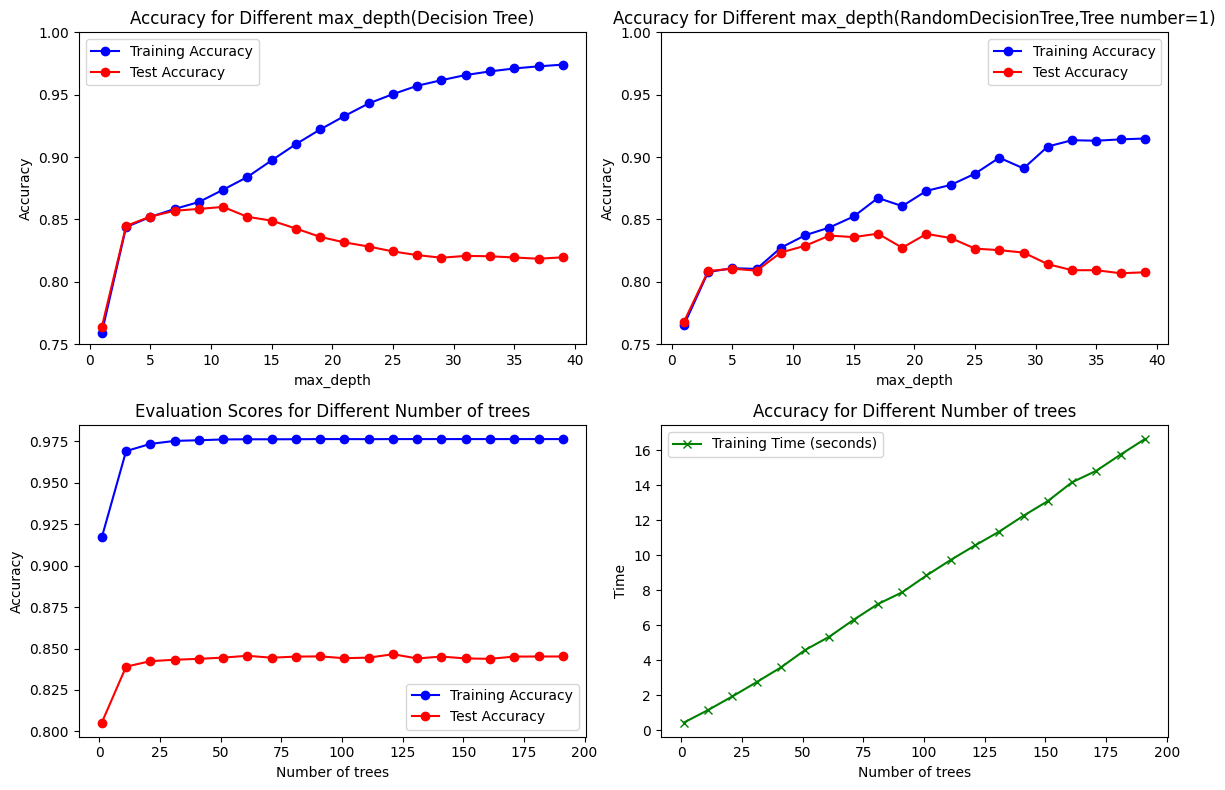

In [ ]:
plt.figure(figsize=(12, 8))

#sub-plot 1
plt.subplot(2, 2, 1)
plt.plot(depth_values, train_scores_list_dt, marker='o', label="Training Accuracy", color="blue")
plt.plot(depth_values, test_scores_list_dt, marker='o', label="Test Accuracy", color="red")
plt.title("Accuracy for Different max_depth(Decision Tree)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.ylim(0.75, 1)
plt.legend()

#sub-plot 2
plt.subplot(2, 2, 2)
plt.plot(depth_values, train_scores_list_rdt, marker='o', label="Training Accuracy", color="blue")
plt.plot(depth_values, test_scores_list_rdt, marker='o', label="Test Accuracy", color="red")
plt.title("Accuracy for Different max_depth(RandomDecisionTree,Tree number=1)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.ylim(0.75, 1)
plt.legend()

#sub-plot 3
plt.subplot(2, 2, 3)
plt.plot(n_estimators, train_scores_list_estimators, marker='o', label="Training Accuracy", color="blue")
plt.plot(n_estimators, test_scores_list_estimators, marker='o', label="Test Accuracy", color="red")
plt.title("Evaluation Scores for Different Number of trees")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.legend()

#sub-plot 4
plt.subplot(2, 2, 4)
plt.plot(n_estimators, loop_times,marker='x', label="Training Time (seconds)", color="green")
plt.title("Accuracy for Different Number of trees")
plt.xlabel("Number of trees")
plt.ylabel("Time")
plt.legend()

plt.tight_layout()
plt.show()

#### Question answers:
1. From the camparison of the first two pictures, we can see that the decision tree is better than the random forest with ensemble size only 1 regarding the training and test accuracy. This is because although both have only one tree, a random forest even with one tree uses feature random sampling, while a single decision tree considers all features
2. As the number of trees increases, the curves become smoother. This is because averaging predictions from multiple trees can reduce model variance and mitigate overfitting
3. As we can see from the third picture, test set accuracy generally improves as the number of trees increases. However, the improvement magnitude gradually diminishes, showing a "convergence" trend. This indicates there's an optimal ensemble size, beyond which additional trees offer diminishing returns
4. Training time is roughly proportional to the number of trees. Using parallel computing(n_jobs=-1) can reduce training time, but it still increases with the number of trees.

# Task 3: Feature importances in random forest classifiers

## Importance of features in RandomForestClassifier(Top10)

In [ ]:
rdt = RandomForestClassifier(n_jobs=-1)
rdt.fit(X_train_encoded, Y_train) #model

RandomForestClassifier(n_jobs=-1)

In [ ]:
importance_scores=rdt.feature_importances_
feature_names = dv.feature_names_

# sorting by importance
importance_dict = sorted(zip(feature_names, importance_scores), key=lambda x: x[1], reverse=True)

# print
print("Feature Importance (sorted):")
rank=0
for feature, importance in importance_dict:
    print(f"{feature}: {importance:.4f}")
    rank+=1
    if rank==10:
        break

Feature Importance (sorted):
age: 0.2312
hours-per-week: 0.1118
capital-gain: 0.1017
marital-status=Married-civ-spouse: 0.0726
education-num: 0.0704
relationship=Husband: 0.0497
capital-loss: 0.0343
marital-status=Never-married: 0.0266
occupation=Exec-managerial: 0.0186
occupation=Prof-specialty: 0.0172


## Explain the first five of these features
We choose the first five of the features, because we find the these
five features account for more than 50% weight.
+ **age: 0.2312**：Generally speaking, as age increases, work experience correspondingly increases, leading to higher annual income.
+ **hours-per-week: 0.1118**：In the training data, individuals with an annual income greater than \\$50,000 have an average working time of 45 hours, which is higher than the 38-hour average of those earning less than \\$50,000. Therefore, working hours are relatively important.
+ **capital-gain: 0.1017**：Investments usually occur when income exceeds expense, meaning these individuals likely already have a certain level of wealth.In this dataset, that corresponds to individuals within an annual income exceeding \\$50,000.Thus, investments are likely not the cause of their annual
income exceeding \\$50,000 but rather the result.
+ **marital-status=Married-civ-spouse: 0.0726**：Marriage gives both
partners a shared goal, allowing them to support each other more
and face life with a more positive attitude, which in turn leads
to an increase in income.
+ **education-num: 0.0704**：The higher the years of education,
the more likely one is to qualify for high-tech jobs, and the higher
 the income.






## An alternative way to compute some sort of importance score of individual features.
We can determine the importance of a single feature by calculating its correlation. A higher correlation indicates that the feature is more significant.